In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Datasets\\Tiktok\\TikTok_songs_2022.csv")
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [3]:
df.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [5]:
df.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,64.186312,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,18.146338,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,18.000000,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,50.000000,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,64.000000,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,81.000000,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.965000,0.939000,0.790000,0.956000,187.906000,5.000000,298933.000000


In [6]:
"""Top Artist on Tiktok"""
def top_category(column,df=df):
    print(df[column].value_counts().head(10))

In [7]:
top_category('artist_name')
# Doja has had the most songs on tiktok in 2022

Doja Cat          8
Coopex            6
Dame Dame         5
Lil Nas X         4
Farux             4
Alex Alexander    4
YES YES           4
The Weeknd        3
Dua Lipa          3
Nito-Onna         3
Name: artist_name, dtype: int64


In [8]:
"""Top Albums on tiktok"""
top_category('album')
# Planet Her by Doja Cat had the most songs on tiktok

Planet Her                              4
Shoot For The Stars Aim For The Moon    3
As It Was                               2
Future Nostalgia                        2
Say It Right                            2
Forever                                 2
After Hours                             2
On My Way                               2
Without You                             2
HOLIDAY                                 1
Name: album, dtype: int64


In [9]:
df.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [10]:
by_popularity = df.groupby('artist_name')['artist_pop'].agg('sum').sort_values(ascending=False)
by_popularity
# Doja Cat is the most popular artist on Tiktok ,while Pia Barris is the leas popular 

artist_name
Doja Cat         704
Coopex           360
Lil Nas X        324
The Weeknd       279
Dua Lipa         264
                ... 
Taylor Watson     29
Myrrhe            26
JAM & Philly      21
Xtinctor          21
Pia Baris         18
Name: artist_pop, Length: 199, dtype: int64

In [11]:
#Does Danceability determine whether an artist is popular or not
by_danceability = df.groupby('artist_name')['danceability'].agg('sum').sort_values(ascending=False)
by_danceability
# The more danceable a song is the more Tiktok listeners choose  it

artist_name
Doja Cat           6.115
Coopex             4.543
Dame Dame          3.709
Lil Nas X          2.893
YES YES            2.777
                   ...  
Elley Duhé         0.410
Ritt Momney        0.399
Suki Waterhouse    0.377
Surf Curse         0.345
Luude              0.308
Name: danceability, Length: 199, dtype: float64

In [12]:
#Does Energy determine whether an artist is popular or not
by_energy = df.groupby('artist_name')['energy'].agg('sum').sort_values(ascending=False)
by_energy
# Tiktok artists are chosen depending on the energy in their songs

artist_name
Doja Cat         5.527
Coopex           4.688
Dame Dame        3.959
YES YES          3.111
Farux            2.972
                 ...  
Billie Eilish    0.340
DripReport       0.332
Myrrhe           0.325
Joji             0.317
Kauai45          0.214
Name: energy, Length: 199, dtype: float64

In [13]:
#Does Tempo determine whether an artist is popular or not
by_tempo = df.groupby('artist_name')['tempo'].agg('sum').sort_values(ascending=False)
by_tempo
# The tempo determines popularity

artist_name
Doja Cat            955.953
Coopex              756.992
Dame Dame           616.967
Lil Nas X           568.741
Alex Alexander      543.991
                     ...   
Oliver Tree          79.982
Peachy!              79.509
Gym Class Heroes     78.953
Imagine Dragons      77.011
S1mba                62.948
Name: tempo, Length: 199, dtype: float64

In [14]:
correlation = df.corr()
correlation

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
artist_pop,1.000000,0.528718,0.025500,-0.182508,0.121257,0.003254,-0.031555,-0.044713,0.061327,-0.072859,-0.197161,0.163149,-0.043446,-0.035407,0.380424
track_pop,0.528718,1.000000,-0.069720,-0.043791,0.095679,0.002747,-0.154423,-0.075914,0.031077,-0.064372,-0.127429,0.106094,-0.030809,0.056081,0.225119
danceability,0.025500,-0.069720,1.000000,-0.119912,0.108099,-0.033789,0.077736,0.194117,-0.012272,-0.068245,-0.161132,0.370981,-0.260987,0.089076,-0.121832
energy,-0.182508,-0.043791,-0.119912,1.000000,0.585077,-0.072749,0.103403,-0.102667,-0.459485,0.102296,0.136489,0.048231,0.085686,0.060364,-0.090278
loudness,0.121257,0.095679,0.108099,0.585077,1.000000,-0.049226,0.087612,-0.088429,-0.388096,-0.054539,0.070948,0.171599,0.032130,0.008168,0.012136
mode,0.003254,0.002747,-0.033789,-0.072749,-0.049226,1.000000,-0.035913,-0.005939,0.024502,0.023045,-0.052448,-0.056816,-0.009931,-0.018849,-0.047168
key,-0.031555,-0.154423,0.077736,0.103403,0.087612,-0.035913,1.000000,0.053440,-0.022624,0.062806,-0.008231,0.040375,0.032613,0.008978,0.021573
speechiness,-0.044713,-0.075914,0.194117,-0.102667,-0.088429,-0.005939,0.053440,1.000000,0.102901,-0.070364,0.021062,0.018362,0.114708,0.116187,-0.185791
acousticness,0.061327,0.031077,-0.012272,-0.459485,-0.388096,0.024502,-0.022624,0.102901,1.000000,0.061498,0.005345,-0.071331,-0.085322,0.003365,0.025784
instrumentalness,-0.072859,-0.064372,-0.068245,0.102296,-0.054539,0.023045,0.062806,-0.070364,0.061498,1.000000,-0.042860,0.033459,-0.023723,0.019530,-0.053660


In [15]:
# Energy ,Key ,speechiness ,instrumentallness,liveness ,tempo ,time signature are all negatively correlated with popularity

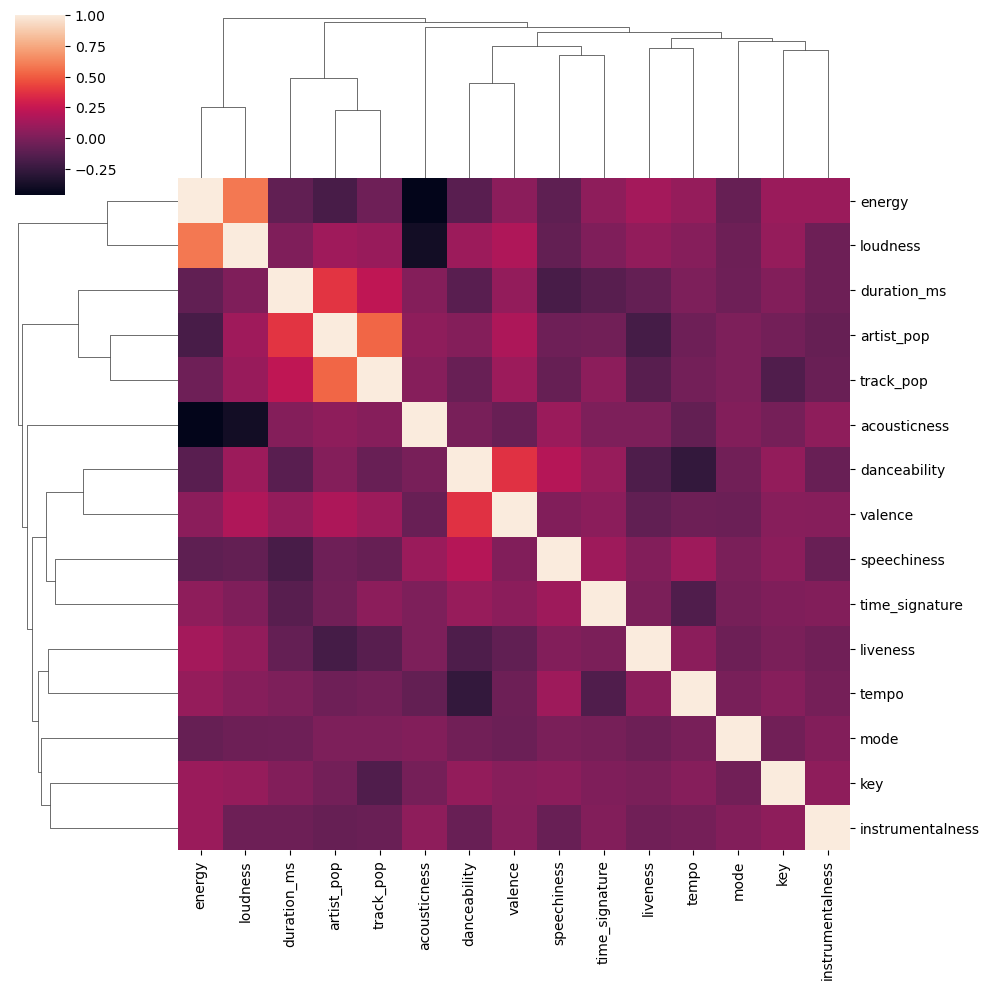

In [16]:
sns.clustermap(correlation)

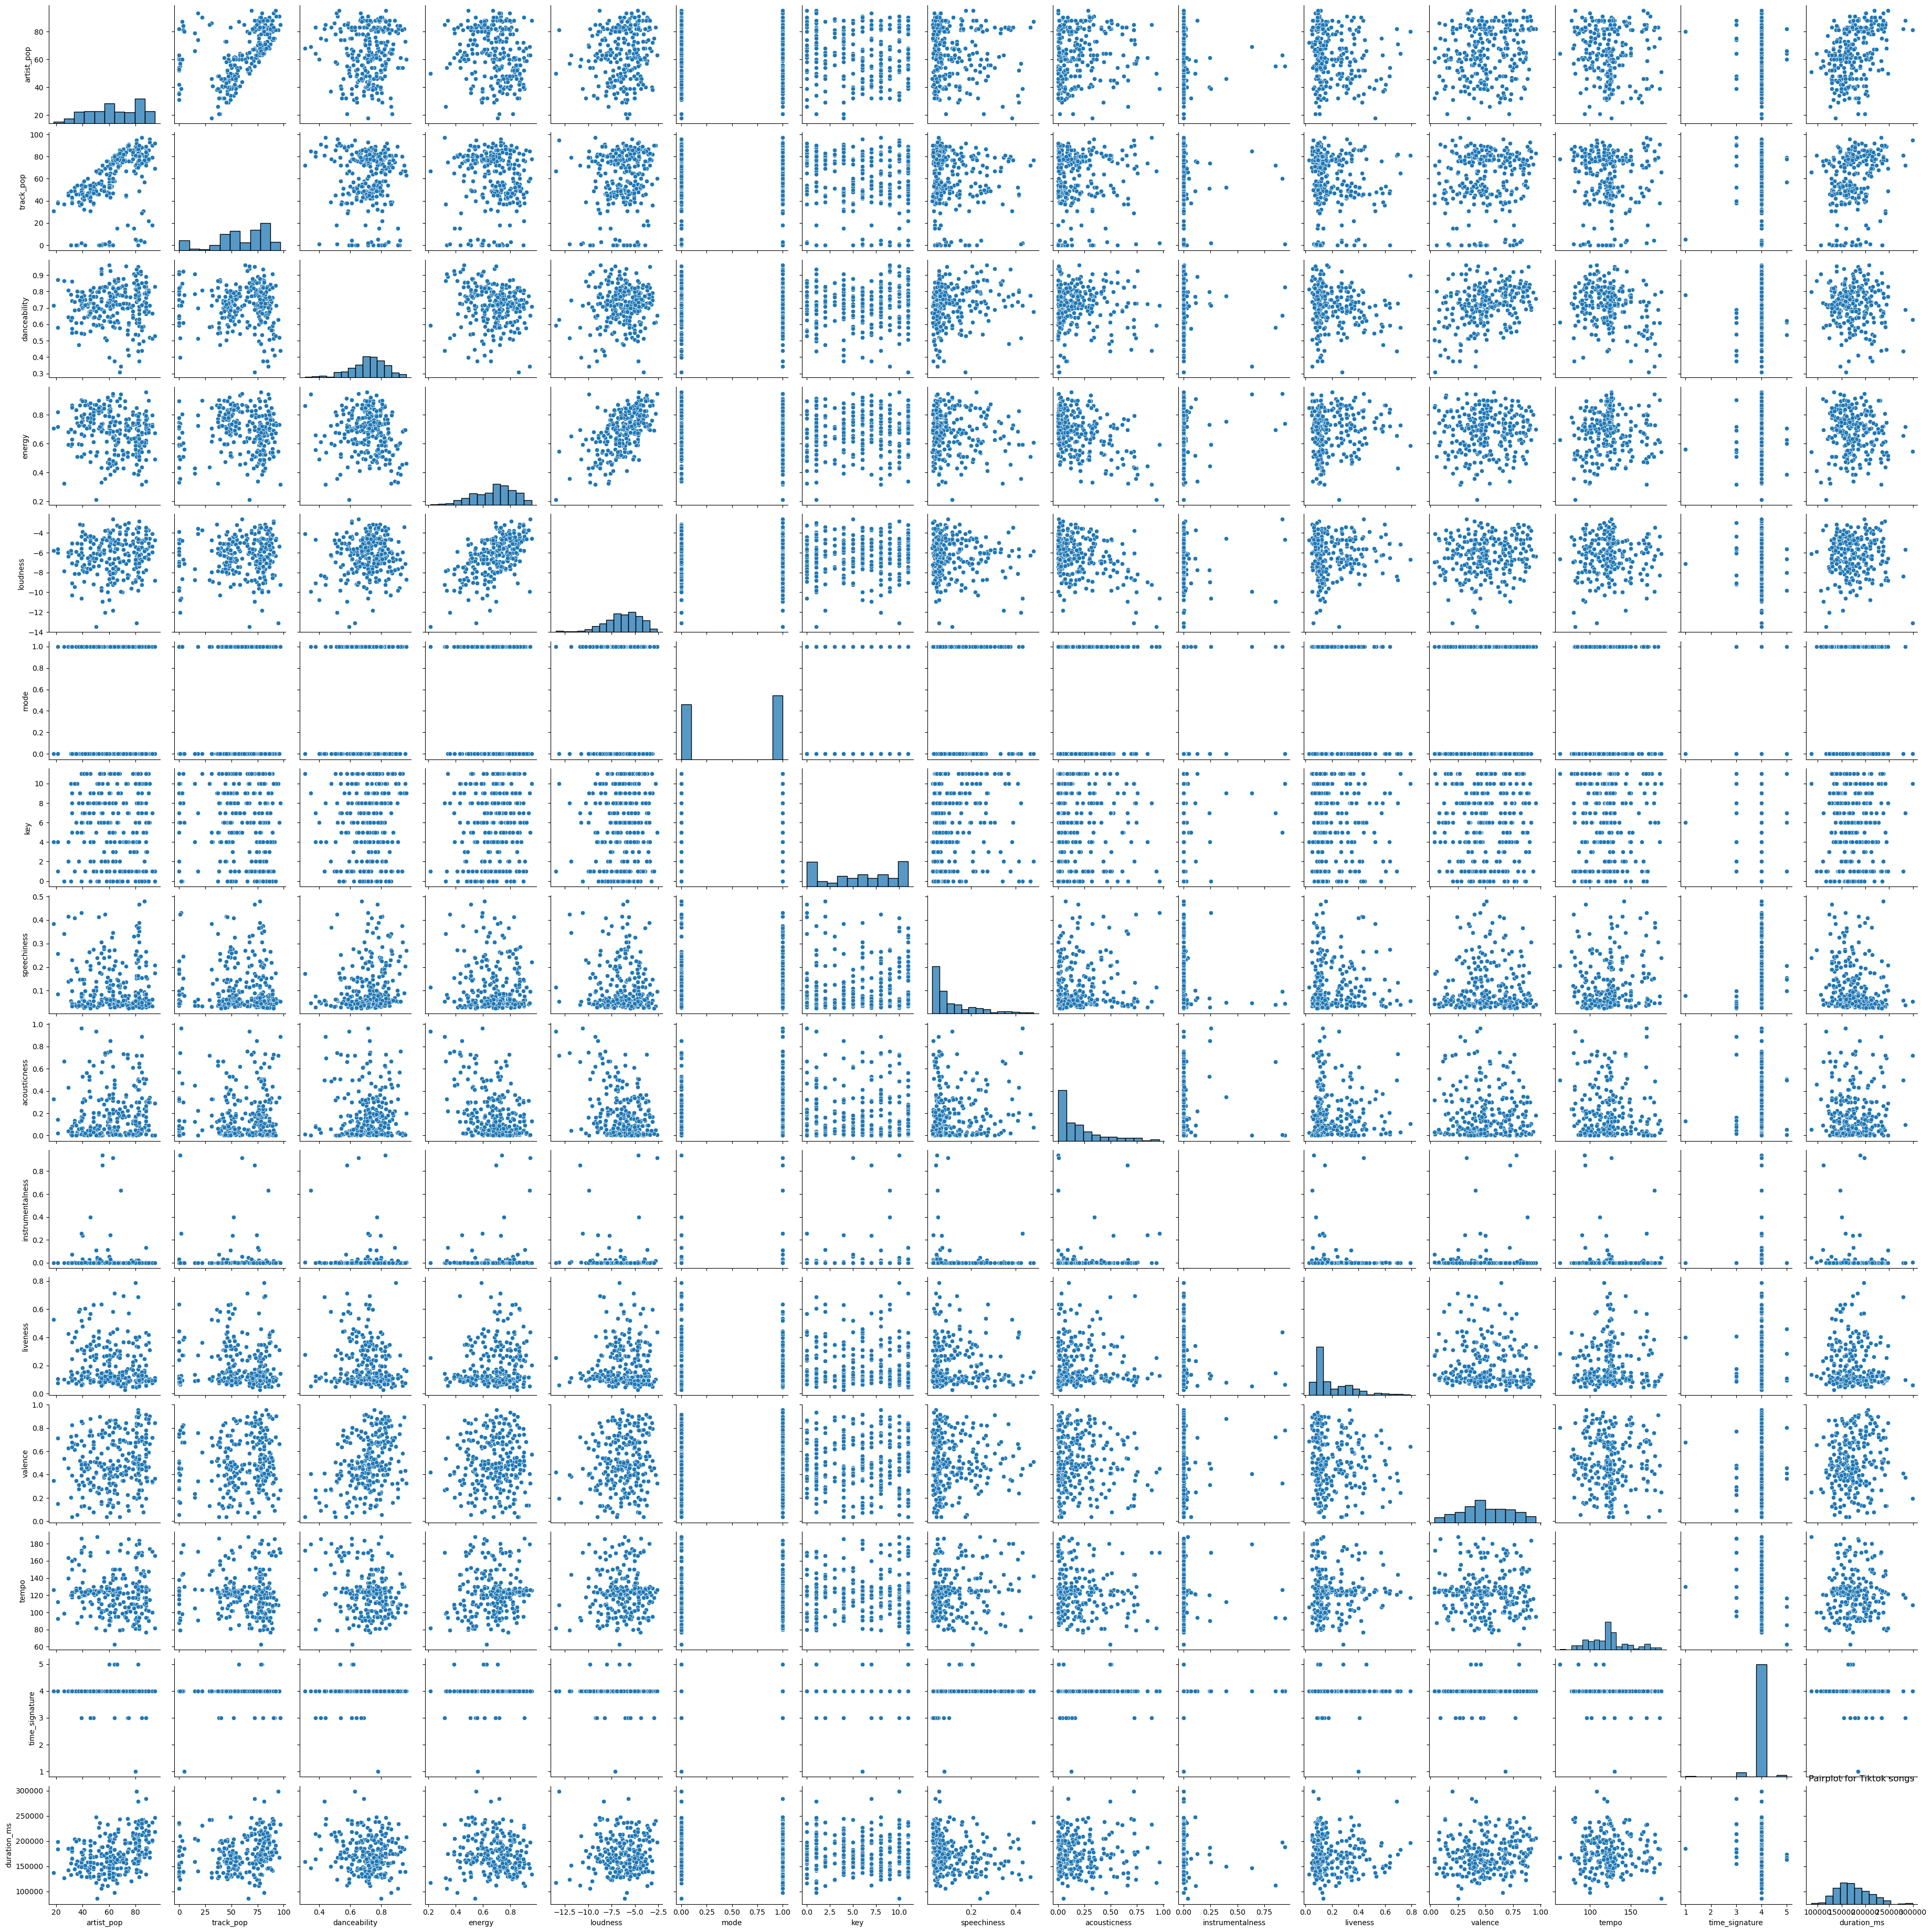

In [17]:
# A PAIRPLOT TO GET SOME INSIGHTS ON LINEARITY
sns.pairplot(df)
plt.title('Pairplot for Tiktok songs')
plt.show()

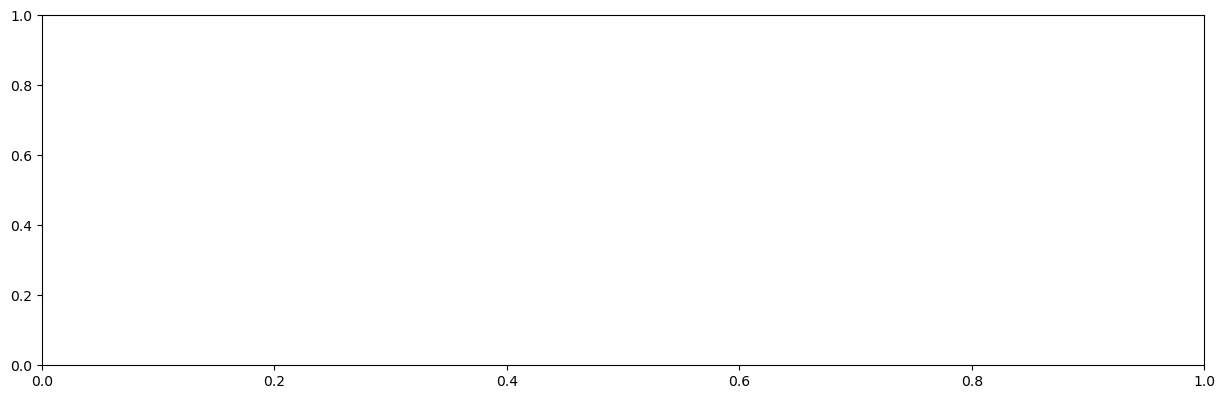

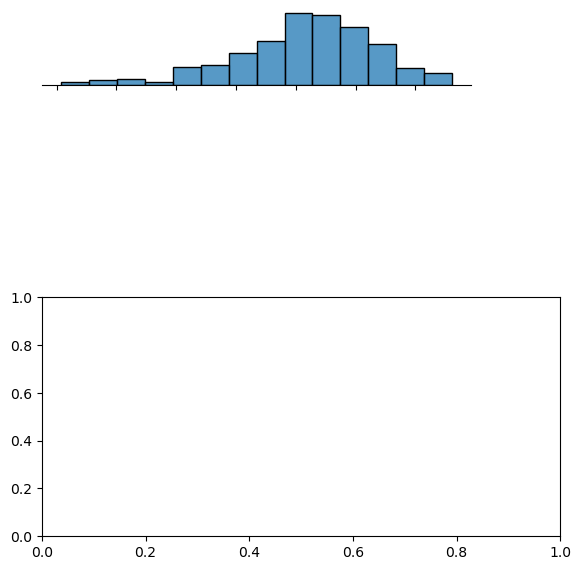

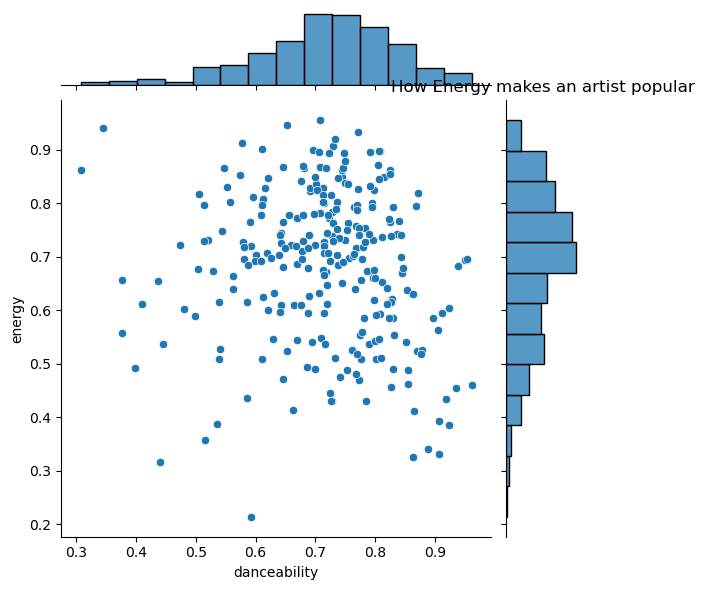

In [18]:
# What makes an Artist or song popular?
fig = plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.jointplot(x= df['danceability'],y = df['artist_pop'])
plt.title('How Danceability makes an artist popular')
plt.subplot(2,1,2)
sns.jointplot(x= df['danceability'],y = df['energy'])
plt.title('How Energy makes an artist popular')
plt.show()

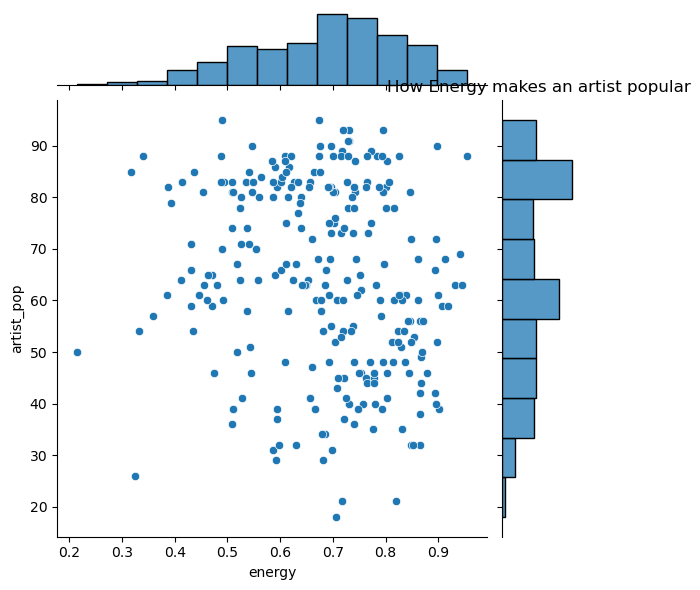

In [19]:
sns.jointplot(x= df['energy'],y = df['artist_pop'])
plt.title('How Energy makes an artist popular')
plt.show()

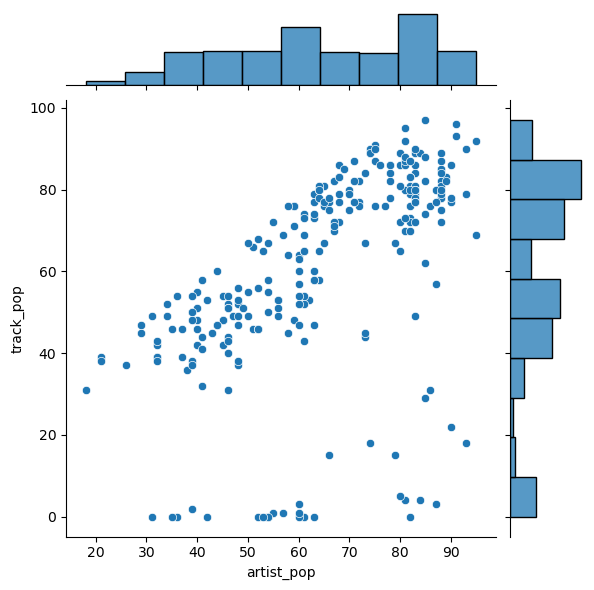

In [20]:
sns.jointplot(x=df['artist_pop'],y=df['track_pop'])

In [21]:
def get_important_features(df):
    important_features = []
    for i in range(0,df.shape[0]):
        important_features.append(df['track_name'][i]+df['artist_name'][i]+df['album'][i])
    return important_features
    

In [22]:
df['Important_Features'] = get_important_features(df)

In [30]:
df.columns
df.head()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,81,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,91,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,73,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,80,89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,81,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [118]:
X = df.drop(['artist_pop','loudness'],axis=1)
y = df['artist_pop']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [120]:
"""Confidence Interval """
import scipy.stats
Confidence = 0.95
z_value = scipy.stats.norm.ppf((1+Confidence)/2)
z_value
rfc.fit(X_train,y_train)
acc_test = rfc.score(X_test,y_test)
ci_length = z_value*np.sqrt((acc_test*(1-acc_test))/y_test.shape[0])
ci_upper = acc_test - ci_length
ci_lower = acc_test + ci_length

print(ci_upper,ci_lower)

0.004356516692498494 0.14658687953391658


In [129]:
from scipy.stats import chi2_contingency,chi2
stat,p,dof,expected =chi2_contingency(X)
prob= 0.90
chi =chi2.ppf(prob,dof)

if abs(stat)>=chi:
    print('Reject Ho: All Variables have a significant relationship')
else :
    print('Fail to Reject Ho')

Reject Ho: All Variables have a significant relationship


In [136]:
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
print(mean_absolute_error(y_test,lr_predict))
print(mean_squared_error(y_test,lr_predict))

12.315445840140804
230.7933934369899


In [137]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))

11.867924528301886
256.77358490566036


In [140]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
r_predictions = rfr.predict(X_test)
print(mean_absolute_error(y_test,r_predictions))
print(mean_squared_error(y_test,r_predictions))

"""Random Forest Regressor was the best model since it gave a lower mean squared error"""

9.202830188679243
133.02406603773582


'Random Forest Regressor was the best model since it gave a lower mean squared error'

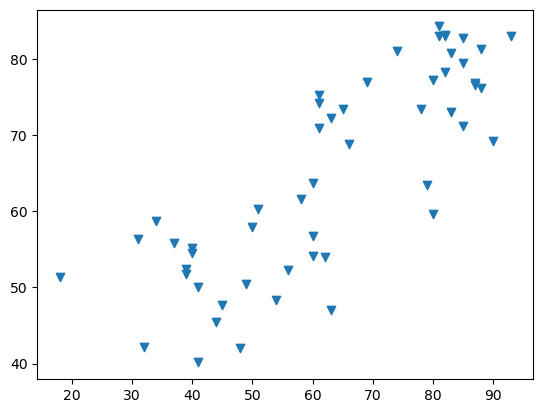

In [146]:
plt.scatter(y_test,r_predictions,marker = 'v')

In [78]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))

12.679245283018869
283.62264150943395


In [125]:
"""We accept Ho that variables have indeed a significant relationship"""

'We accept Ho that variables have indeed a significant relationship'

In [126]:
"""PRINCIPAL COMPONENT ANALYSIS"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit_transform(X)


In [127]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

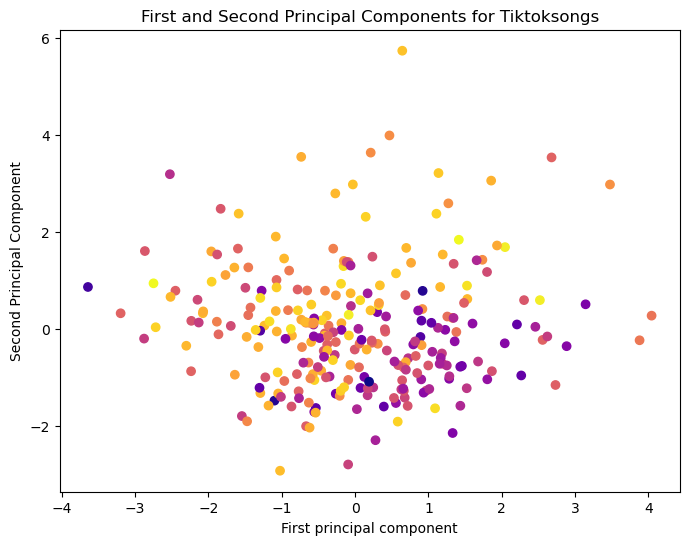

In [128]:
fig=plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['artist_pop'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('First and Second Principal Components for Tiktoksongs')
plt.show()
